# Project Overview

## Sonar Data

If one searches Sonar on Wikipedia, it says "Sonar (sound navigation and ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, measure distances (ranging), communicate with or detect objects on or under the surface of the water, such as other vessels." Our data set is from UCI Machine Learning Repository, and one can read the full data descriptions and relevant papers from this UCI ML Repository page, Connectionist Bench (Sonar, Mines vs. Rocks) Data Set. The data contains 208 patterns obatined by bouncing sonar signals off some object from various angles. Each pattern is a set of 60 numbers ranging from 0.0 to 1.0, and it represents the energy within a particular frequency band, integrated over a certain period of time. We will use this data set to predict if an object is rock or mine.

## Goal
1.Visualize the data to see meaningful correlations

2.Use KNN Classifier to determine whether an object is a rock or mine

3.Evaluate the model by comparing models with different K values

In [1]:
# lets import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('sonar.csv')

In [3]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [5]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
df.isnull()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

lets Create a heatmap of the correlation between the difference frequency responses.

<AxesSubplot:>

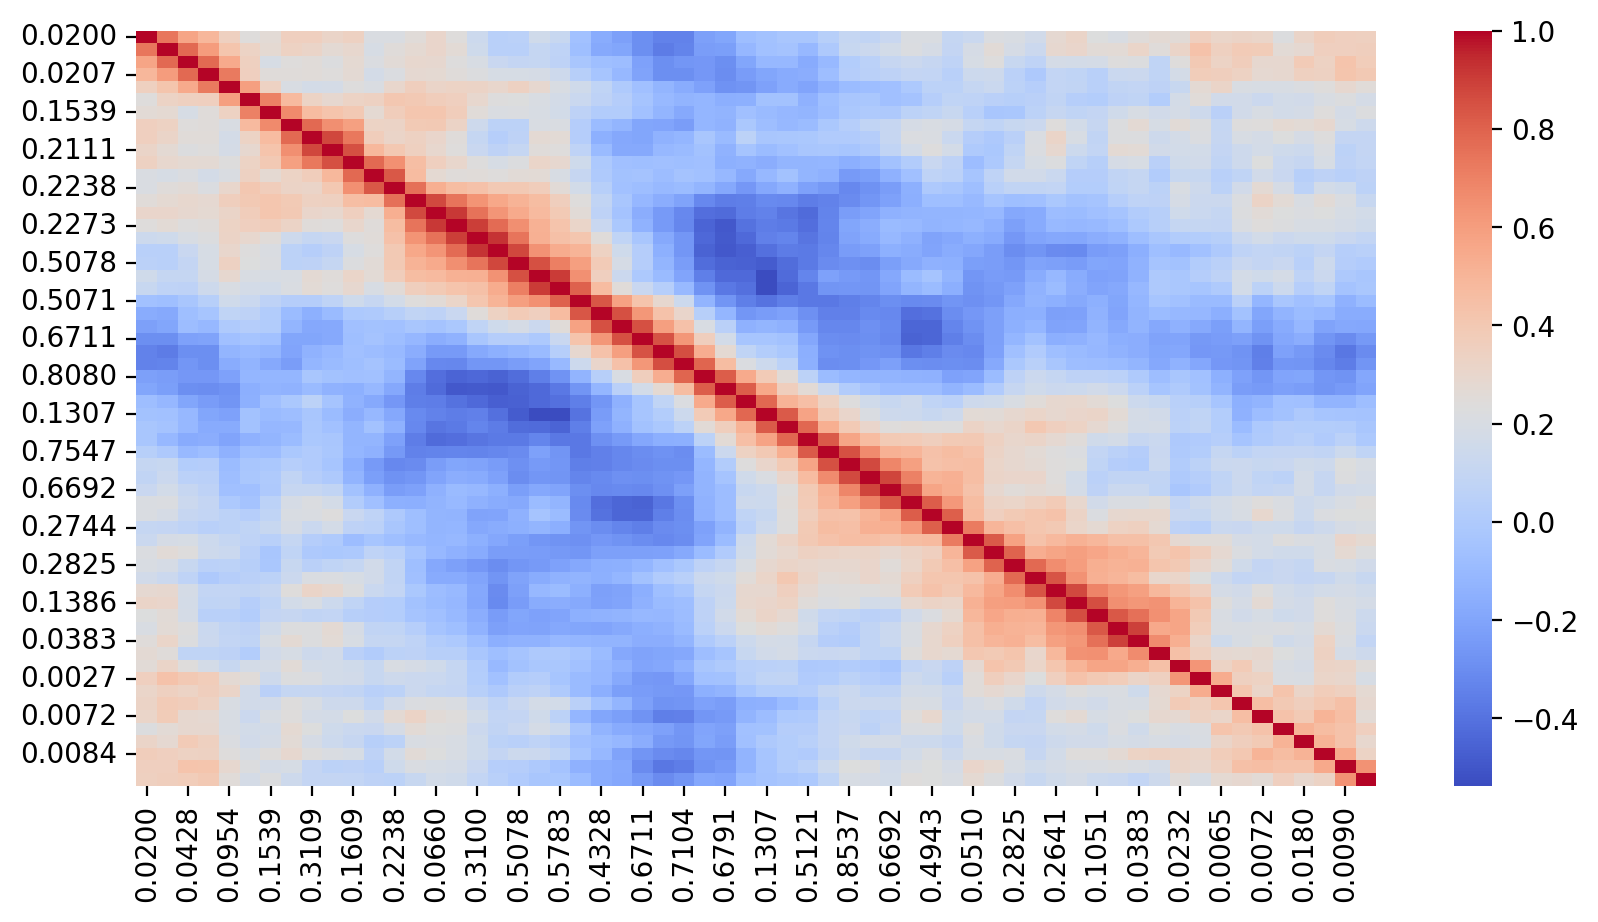

In [8]:
plt.figure(figsize=(10,5),dpi=200)
sns.heatmap(df.corr(),cmap='coolwarm')

 What are the top 5 correlated frequencies with the target\label?

In [9]:
df['R'].value_counts()

M    111
R     96
Name: R, dtype: int64

In [10]:
df['Target']=df['R'].map({'R':0,'M':1})

In [11]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,Target
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,0
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,0
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R,0


In [12]:
np.abs(df.corr()['Target']).sort_values().tail(5)

0.2641    0.342801
0.0383    0.350441
0.1582    0.390331
0.1609    0.431452
Target    1.000000
Name: Target, dtype: float64

## Train | Test Split

Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X = df.drop(['R', 'Target'], axis=1) 
y = df['R']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

#### Create a PipeLine that contains both a StandardScaler and a KNN mode

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [17]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [18]:
operations = [('scaler', scaler), ('knn', knn)]

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
pipe = Pipeline(operations)

#### Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
k_values = list(range(1, 30))

In [23]:
parameters = {'knn__n_neighbors': k_values}

In [24]:
full_cv_classifier = GridSearchCV(pipe, parameters, cv=5, scoring='accuracy')

In [25]:
full_cv_classifier

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [26]:
full_cv_classifier.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [27]:
# check best estimator
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

#### Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.

In [28]:
full_cv_classifier.cv_results_

{'mean_fit_time': array([0.03226166, 0.02310095, 0.0237309 , 0.02500868, 0.02363114,
        0.02401662, 0.01986256, 0.02158628, 0.01732192, 0.01459832,
        0.01340942, 0.01562276, 0.0157443 , 0.01578474, 0.01387153,
        0.01825995, 0.0145287 , 0.0154108 , 0.01231194, 0.01775541,
        0.01501904, 0.0147903 , 0.01760721, 0.01555514, 0.01279473,
        0.01571236, 0.01545486, 0.01630769, 0.01473846]),
 'std_fit_time': array([0.00586435, 0.00282038, 0.00272906, 0.00325566, 0.00531805,
        0.00246789, 0.00311921, 0.00176747, 0.00198735, 0.00183899,
        0.0014223 , 0.00270379, 0.00346335, 0.0006735 , 0.00152424,
        0.0017815 , 0.00163293, 0.00122068, 0.00204894, 0.00104749,
        0.00272173, 0.0034565 , 0.00410177, 0.00120085, 0.00217878,
        0.00218776, 0.00186918, 0.00284558, 0.00341524]),
 'mean_score_time': array([0.0253334 , 0.01766157, 0.0197566 , 0.02201328, 0.01796784,
        0.02010522, 0.01667399, 0.0210639 , 0.01377902, 0.01093106,
        0.012188

In [29]:
pd.DataFrame(full_cv_classifier.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032262,0.005864,0.025333,0.006088,1,{'knn__n_neighbors': 1},0.789474,0.891892,0.783784,0.918919,0.918919,0.860597,0.061223,1
1,0.023101,0.002820,0.017662,0.002522,2,{'knn__n_neighbors': 2},0.789474,0.675676,0.810811,0.702703,0.891892,0.774111,0.077774,8
2,0.023731,0.002729,0.019757,0.001875,3,{'knn__n_neighbors': 3},0.815789,0.810811,0.864865,0.837838,0.891892,0.844239,0.030542,2
3,0.025009,0.003256,0.022013,0.004507,4,{'knn__n_neighbors': 4},0.842105,0.648649,0.810811,0.729730,0.864865,0.779232,0.079732,6
4,0.023631,0.005318,0.017968,0.003629,5,{'knn__n_neighbors': 5},0.815789,0.756757,0.837838,0.729730,0.864865,0.800996,0.050381,3


In [39]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.86059744, 0.77411095, 0.84423898, 0.77923186, 0.80099573,
       0.75803698, 0.76870555, 0.76358464, 0.79046942, 0.77980085,
       0.77439545, 0.75291607, 0.75817923, 0.74751067, 0.75291607,
       0.75291607, 0.7311522 , 0.73655761, 0.73641536, 0.74182077,
       0.74182077, 0.71493599, 0.73100996, 0.7257468 , 0.73655761,
       0.72034139, 0.72048364, 0.71522048, 0.72048364])

Text(0, 0.5, 'Mean Test Score / Accuracy')

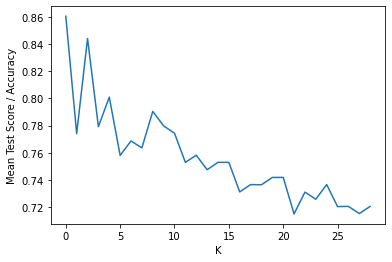

In [30]:
# plt.plot(k_values, mean_test_scores, marker='.', markersize=10)
pd.DataFrame(full_cv_classifier.cv_results_)['mean_test_score'].plot()
plt.xlabel('K')
plt.ylabel('Mean Test Score / Accuracy')


### Final Model Evaluation
Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix. 

In [32]:
full_pred = full_cv_classifier.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [34]:
confusion_matrix(y_test, full_pred)

array([[13,  1],
       [ 0,  7]], dtype=int64)

C:\Users\monis\anaconda3\Anakonda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


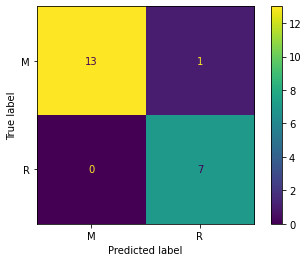

In [35]:
plot_confusion_matrix(full_cv_classifier, X_test, y_test);

In [37]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           M       1.00      0.93      0.96        14
           R       0.88      1.00      0.93         7

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21

